# LSTM for prediction of epsilon angles of RNA


## Method Used : Keras

## Import Libraries

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import array
from numpy import hstack
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from google.colab import files
from sklearn.preprocessing import StandardScaler


## Load Dataset

In [ ]:
# Upload the CSV file
uploaded = files.upload()

# Assuming you uploaded 'training_with_classes.csv'
file_path = 'New_training.csv'
df = pd.read_csv(file_path)

Saving New_training.csv to New_training (1).csv
Saving New_test.csv to New_test.csv


Preprocessing

In [ ]:
df.head(10)

,rank,A,C,G,U,name,epsilon,class
0,1,1,0,0,0,1CSL,-99.4,10
1,2,1,0,0,0,1CSL,-138.0,6
2,3,0,1,0,0,1CSL,-150.0,4
3,4,0,0,1,0,1CSL,-154.3,4
4,5,0,0,1,0,1CSL,-151.4,4
5,6,0,0,1,0,1CSL,-145.7,5
6,7,0,1,0,0,1CSL,-155.8,3
7,8,0,0,1,0,1CSL,-151.5,4
8,9,0,1,0,0,1CSL,-157.1,3
9,10,1,0,0,0,1CSL,-154.4,4


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'class' is your target variable
target_variable = 'class'

# Create a label encoder
label_encoder = LabelEncoder()

# Apply label encoding to 'class' column
df[target_variable] = label_encoder.fit_transform(df[target_variable])


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11862 entries, 0 to 11861
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   rank     11862 non-null  int64  
 1   A        11862 non-null  int64  
 2   C        11862 non-null  int64  
 3   G        11862 non-null  int64  
 4   U        11862 non-null  int64  
 5   name     11862 non-null  int64  
 6   epsilon  11862 non-null  float64
 7   class    11862 non-null  int64  
dtypes: float64(1), int64(7)
memory usage: 741.5 KB
None


In [ ]:
df['class'].isnull().sum()

0

In [ ]:
# Check the updated DataFrame
df.head(100)

,rank,A,C,G,U,name,epsilon,class
0,1,1,0,0,0,0,-99.4,1
1,2,1,0,0,0,0,-138.0,6
2,3,0,1,0,0,0,-150.0,4
3,4,0,0,1,0,0,-154.3,4
4,5,0,0,1,0,0,-151.4,4
...,...,...,...,...,...,...,...,...
95,18,0,0,1,0,2,-128.7,8
96,19,0,0,1,0,2,-158.5,3
97,20,0,0,0,1,2,-148.3,4
98,21,0,1,0,0,2,-157.0,3


# split a multivariate sequence into samples

In [ ]:
def split_sequences(sequences, n_steps):
	X, y = list(), list()

	for i in range(len(sequences)):
		# find the end of this subsequence
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequences)-1:
			break
		# combine input and output parts of the subsequence
		seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix, :]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

In [ ]:
def split_sequences(sequences, n_steps):
    X, y = list(), list()

    for i in range(len(sequences)):
        # find the end of this subsequence
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequences)-1:
            break
        # combine input and output parts of the subsequence
        seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix, :]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)


# Split the dataset into train and test sets

## Creating the Model
** You can apply the different deep learning tools that allow to improve the results **

Built a LSTM model with 1 hidden layer.

Every LSTM layer should be accompanied by a Dropout layer. This layer will help to prevent overfitting.

In [ ]:
# Import necessary libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout,SimpleRNN
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_absolute_error

from keras.layers import Masking

In [ ]:
map={
    '1' : -174.5,
    '2' : -165.5,
    '3' : -158.5,
    '4' : -150.5,
    '5' : -144.0,
    '6' : -139.0,
    '7' : -134.5,
    '8' : -127.5,
    '9' : -113.5,
    '10' : -80.5,
    '11' : 53.5,
    '12' : 171.5,
    '13' : 185.0,

    }

In [ ]:
# Data cleaning
# Assuming 'class' is your target variable

df['class'] = df['class'].replace('Na', '13')
df['class'] = df['class'].astype(int)


In [ ]:
#Defining features
input_features = ['A','C','G','U','rank']
X = df[input_features].values


In [ ]:
#Defining target variable
target_variable = 'class'
y = df[target_variable].values

In [ ]:

# Data splitting
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
#Creating the Neural Network

model = Sequential()
model.add(Masking(mask_value=0.0, input_shape=(None, x_train.shape[1])))
model.add(LSTM(100))
model.add(Dropout(0.2))
model.add(Dense(1, activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


In [ ]:
# Reshape x_train and x_test to be 3D: (samples, time_steps, features)
x_train_reshaped = x_train.reshape((x_train.shape[0], 1, x_train.shape[1]))
x_test_reshaped = x_test.reshape((x_test.shape[0], 1, x_test.shape[1]))

In [ ]:

# Fit the model
model.fit(x_train_reshaped , y_train, epochs=400, verbose=1)


In [ ]:
#Defining Mean Absolute Error function

def calculate_mae(epsilon_truth,y_pred):
  sum=0
  for i in range(len(y_pred)):
    di=np.abs(map[str(y_pred[i])]-epsilon_truth[i])
    ae=min(di,360-di)
    sum+=ae

  return sum/len(y_pred)


112/112 [==============================] - 1s 2ms/step - loss: 0.9903
Scores mse 0.9902759194374084
112/112 [==============================] - 0s 1ms/step


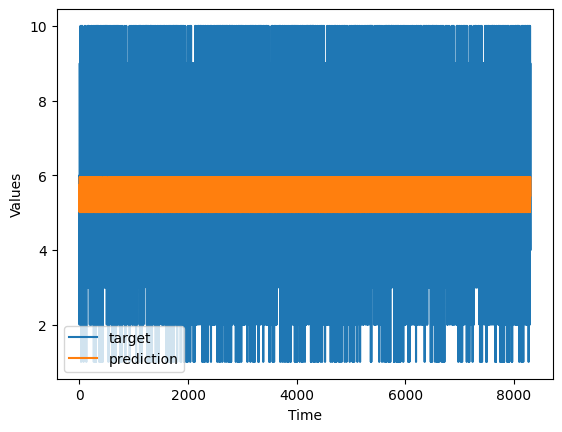

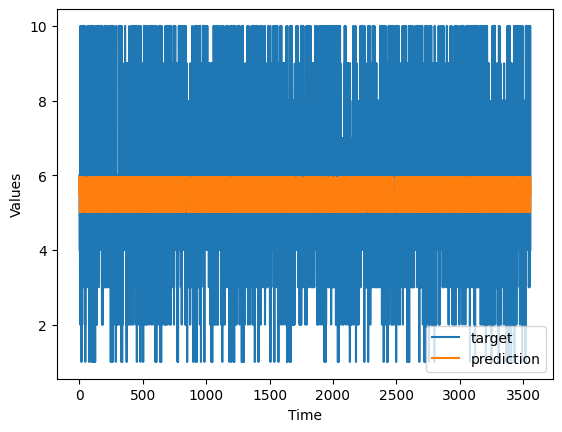

Mean Absolute Error (MAE) - Training Set: 2.01653877504378


In [ ]:

# Evaluate the model on the test set
score = model.evaluate(x_test, y_test, verbose=1)
print("Scores mse", score)

# Predictions
trainPredict_scaled = model.predict(x_train_reshaped)
testPredict_scaled = model.predict(x_test_reshaped)

# Inverse transform the predictions
trainPredict = scaler_y.inverse_transform(trainPredict_scaled)
testPredict = scaler_y.inverse_transform(testPredict_scaled)

# Plot baseline and predictions for the training set
plt.xlabel('Time')
plt.ylabel('Values')
plt.plot(y_train.flatten(), label='target')
plt.plot(trainPredict.flatten(), label='prediction')
plt.legend()
plt.show()

# Plot baseline and predictions for the test set
plt.xlabel('Time')
plt.ylabel('Values')
plt.plot(y_test.flatten(), label='target')
plt.plot(testPredict.flatten(), label='prediction')
plt.legend()
plt.show()

# Calculate MAE for training set
mae_train = calculate_mae(y_train.flatten(), trainPredict.flatten())
print(f"Mean Absolute Error (MAE) - Training Set: {mae_train}")

# Calculate MAE for test set
mae_test = calculate_mae(y_test.flatten(), testPredict.flatten())

In [ ]:
# Save the model
model.save('modelLSTMRNA')

## Results Visualisation

260/260 [==============================] - 1s 2ms/step


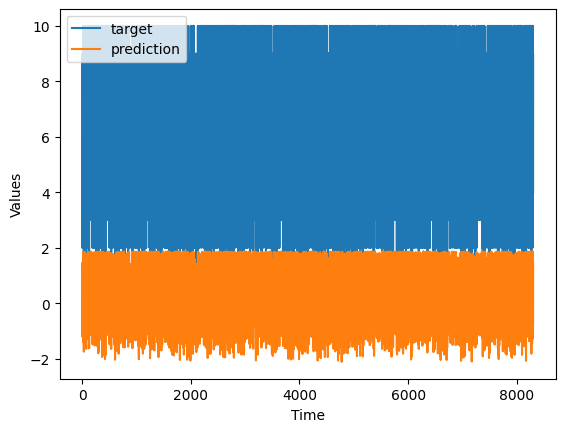

112/112 [==============================] - 0s 2ms/step


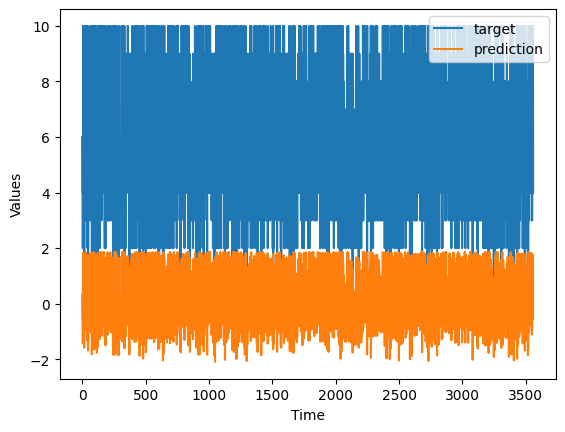

In [ ]:
# Plot baseline and predictions for the training set
plt.xlabel('Time')
plt.ylabel('Values')
plt.plot(y_train[:, 0], label='target')  # Change here
trainPredict = (model.predict(x_train_reshaped))[:, 0]  # Change here
plt.plot(trainPredict, label='prediction')
plt.legend()
plt.show()

# Plot baseline and predictions for the test set
plt.xlabel('Time')
plt.ylabel('Values')
plt.plot(y_test[:, 0], label='target')  # Change here
testPredict = (model.predict(x_test_reshaped))[:, 0]  # Change here
plt.plot(testPredict, label='prediction')
plt.legend()
plt.show()


# Sample Test

In [ ]:
sequence = input("Enter the sequence: ").upper()

nucleotide_vector = list(sequence)
rank = list(range(1, len(nucleotide_vector) + 1))

df2= pd.DataFrame({'sequence': nucleotide_vector})
df2['A'] = (df2['sequence'] == 'A').astype(int)
df2['C'] = (df2['sequence'] == 'C').astype(int)
df2['G'] = (df2['sequence'] == 'G').astype(int)
df2['U'] = (df2['sequence'] == 'U').astype(int)
df2=df2[['A','C','G','U']]
df2

Enter the sequence: ACCGGUUUCCCGUAAUUCCUGGUACCUUUU


,A,C,G,U
0,1,0,0,0
1,0,1,0,0
2,0,1,0,0
3,0,0,1,0
4,0,0,1,0
5,0,0,0,1
6,0,0,0,1
7,0,0,0,1
8,0,1,0,0
9,0,1,0,0
